# 09/11/23 - K-Means Clustering
It helps to discover homogeneous subgroups within the dataset so that data points in each cluster of initial centroids are comparable and similar based on similarity measure like euclidean distance
Since it's distance based we are required to standarized the data<br>
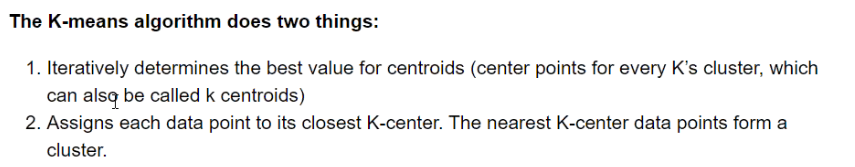<br>
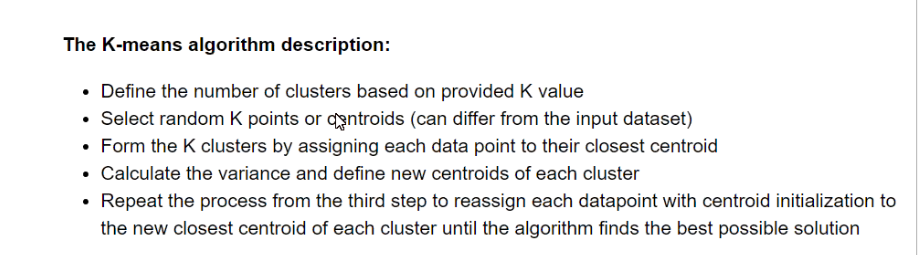<br>
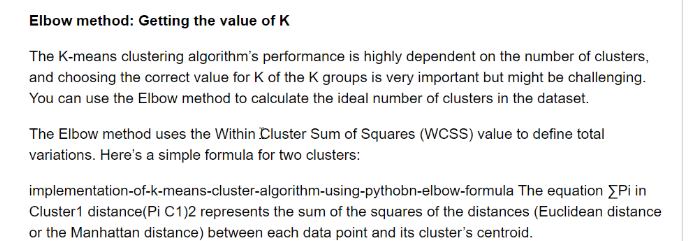

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
k_means_df = pd.read_csv('../../dataset/K-Means-dataset.csv')
k_means_df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
k_means_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

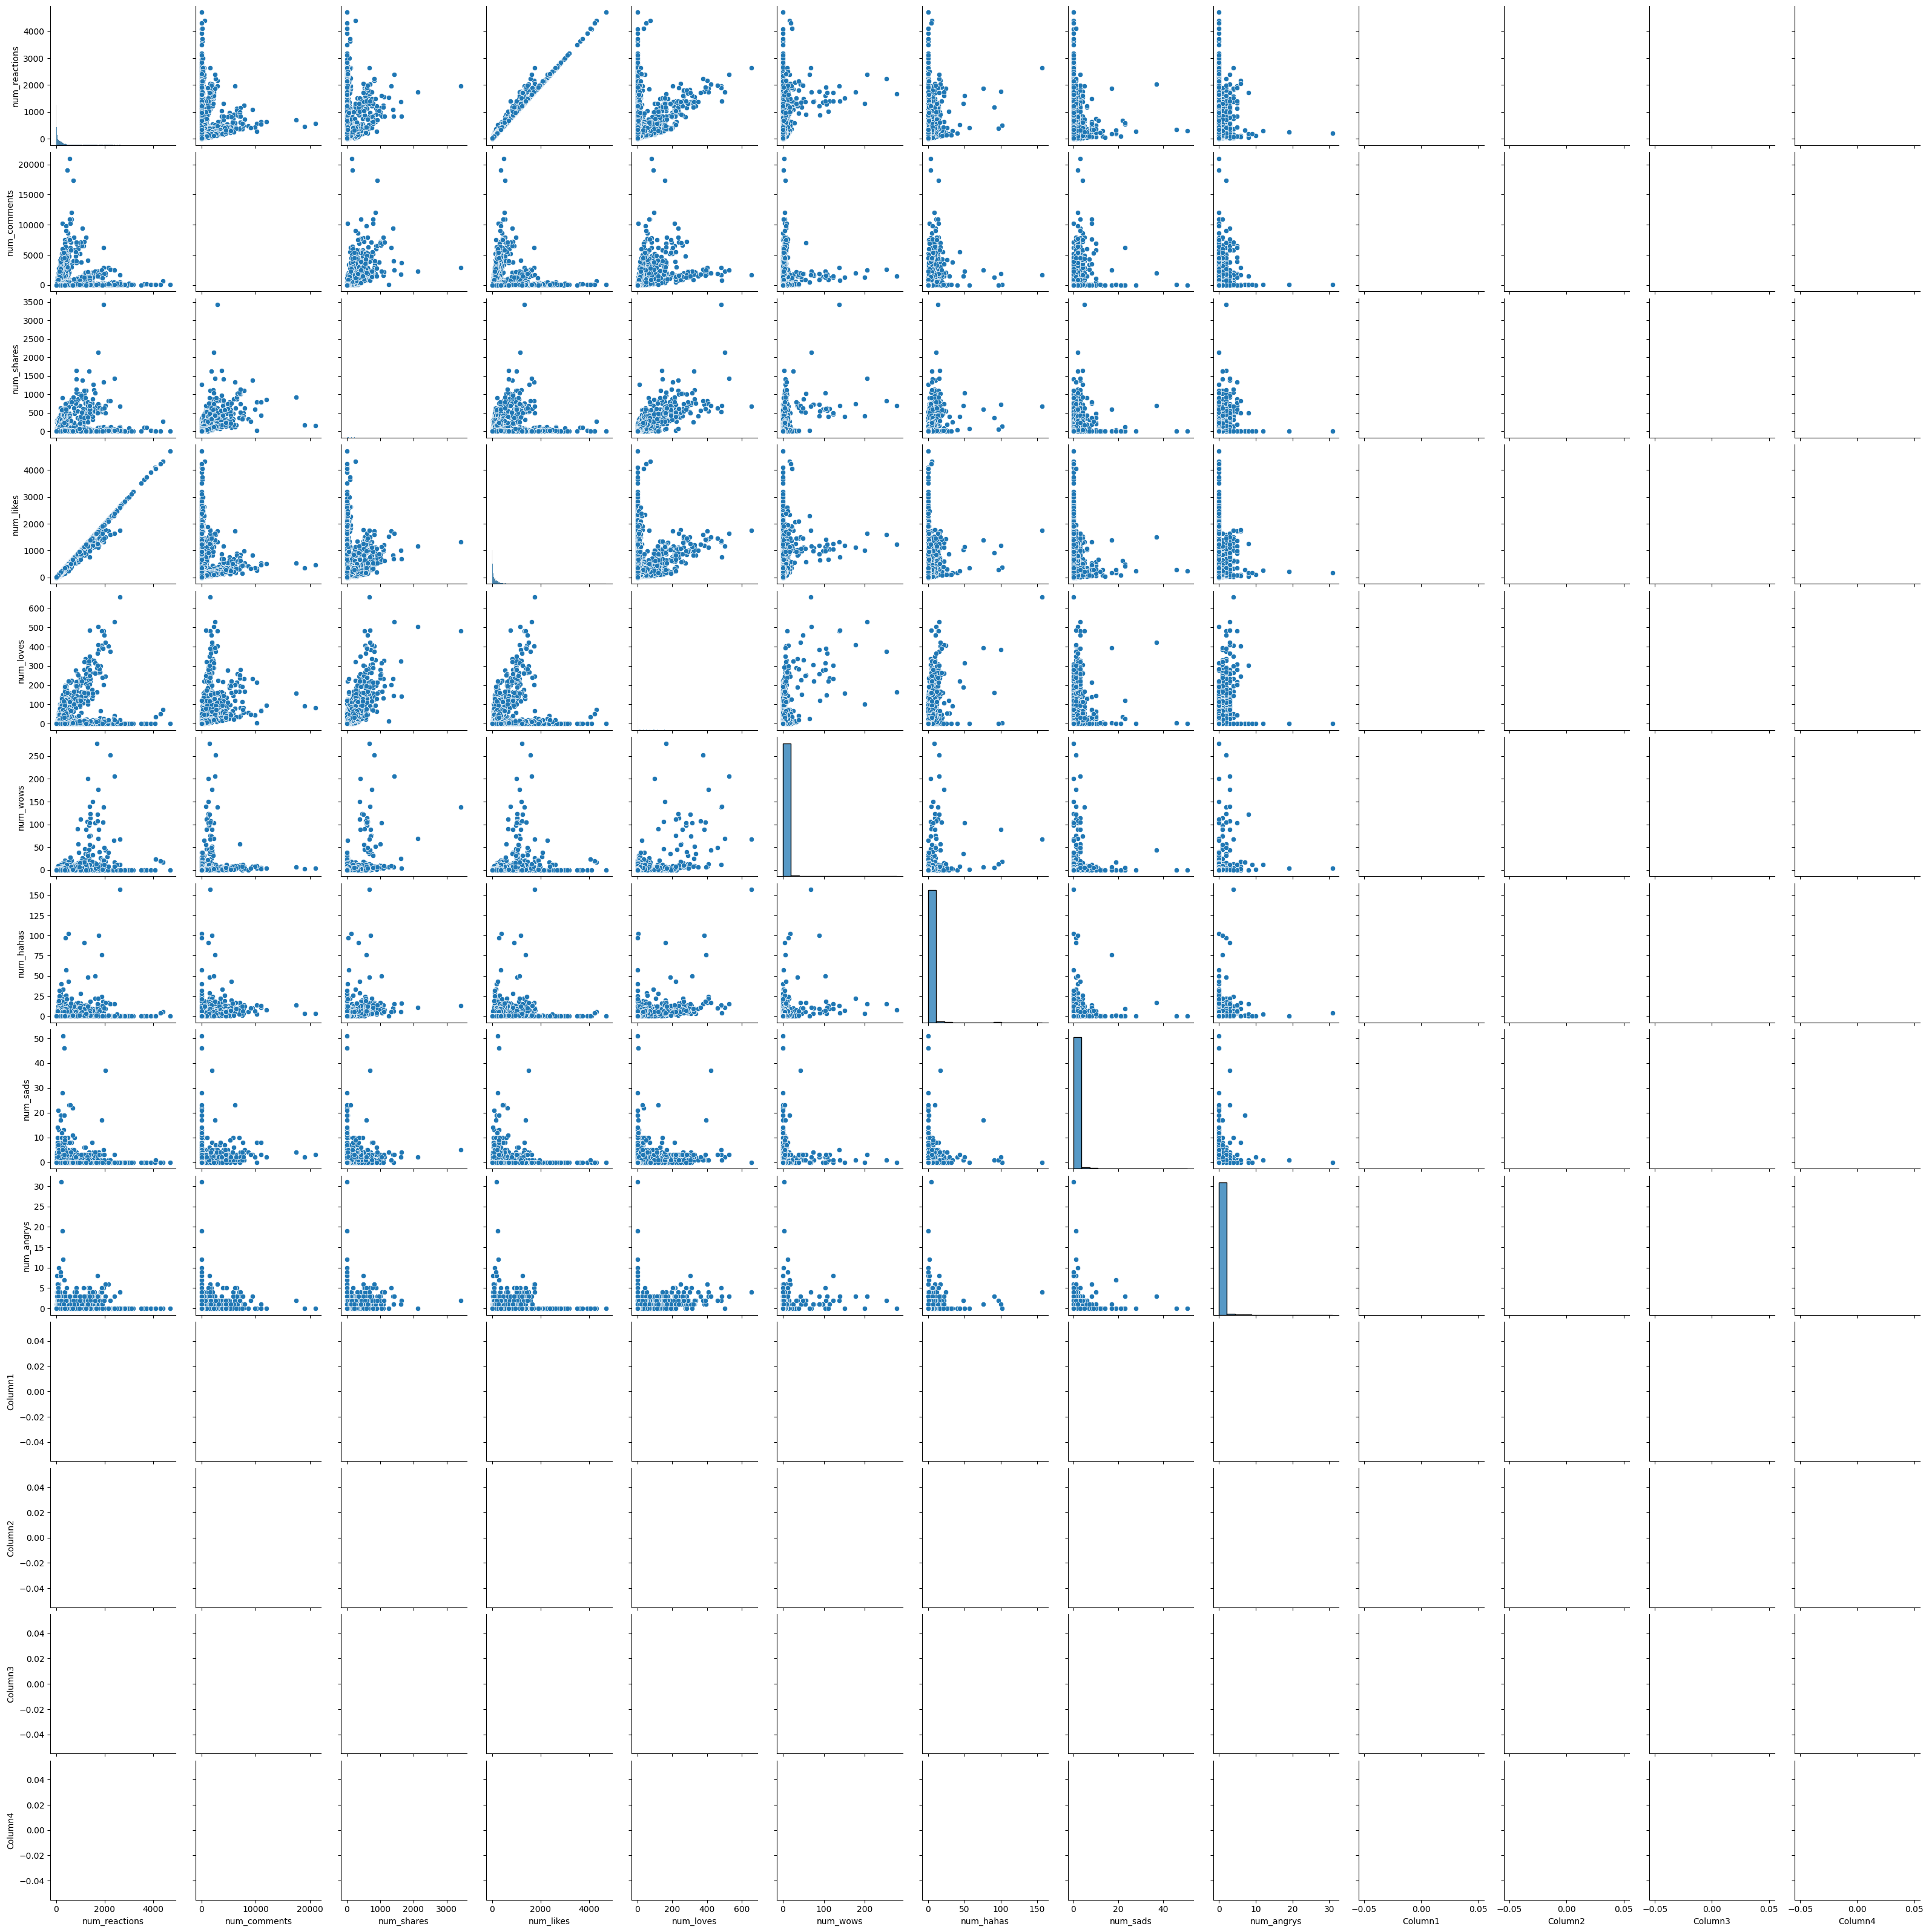

In [8]:
sns.pairplot(k_means_df)

In [ ]:
k_means_df.drop(columns=['Column1','Column2','Column3','Column4'],inplace=True)

In [12]:
k_means_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [22]:
k_means_df['status_type'].unique()

array([3, 1, 0, 2])

In [13]:
k_means_df.drop(columns=['status_id','status_published'],inplace=True)

In [15]:
k_means_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


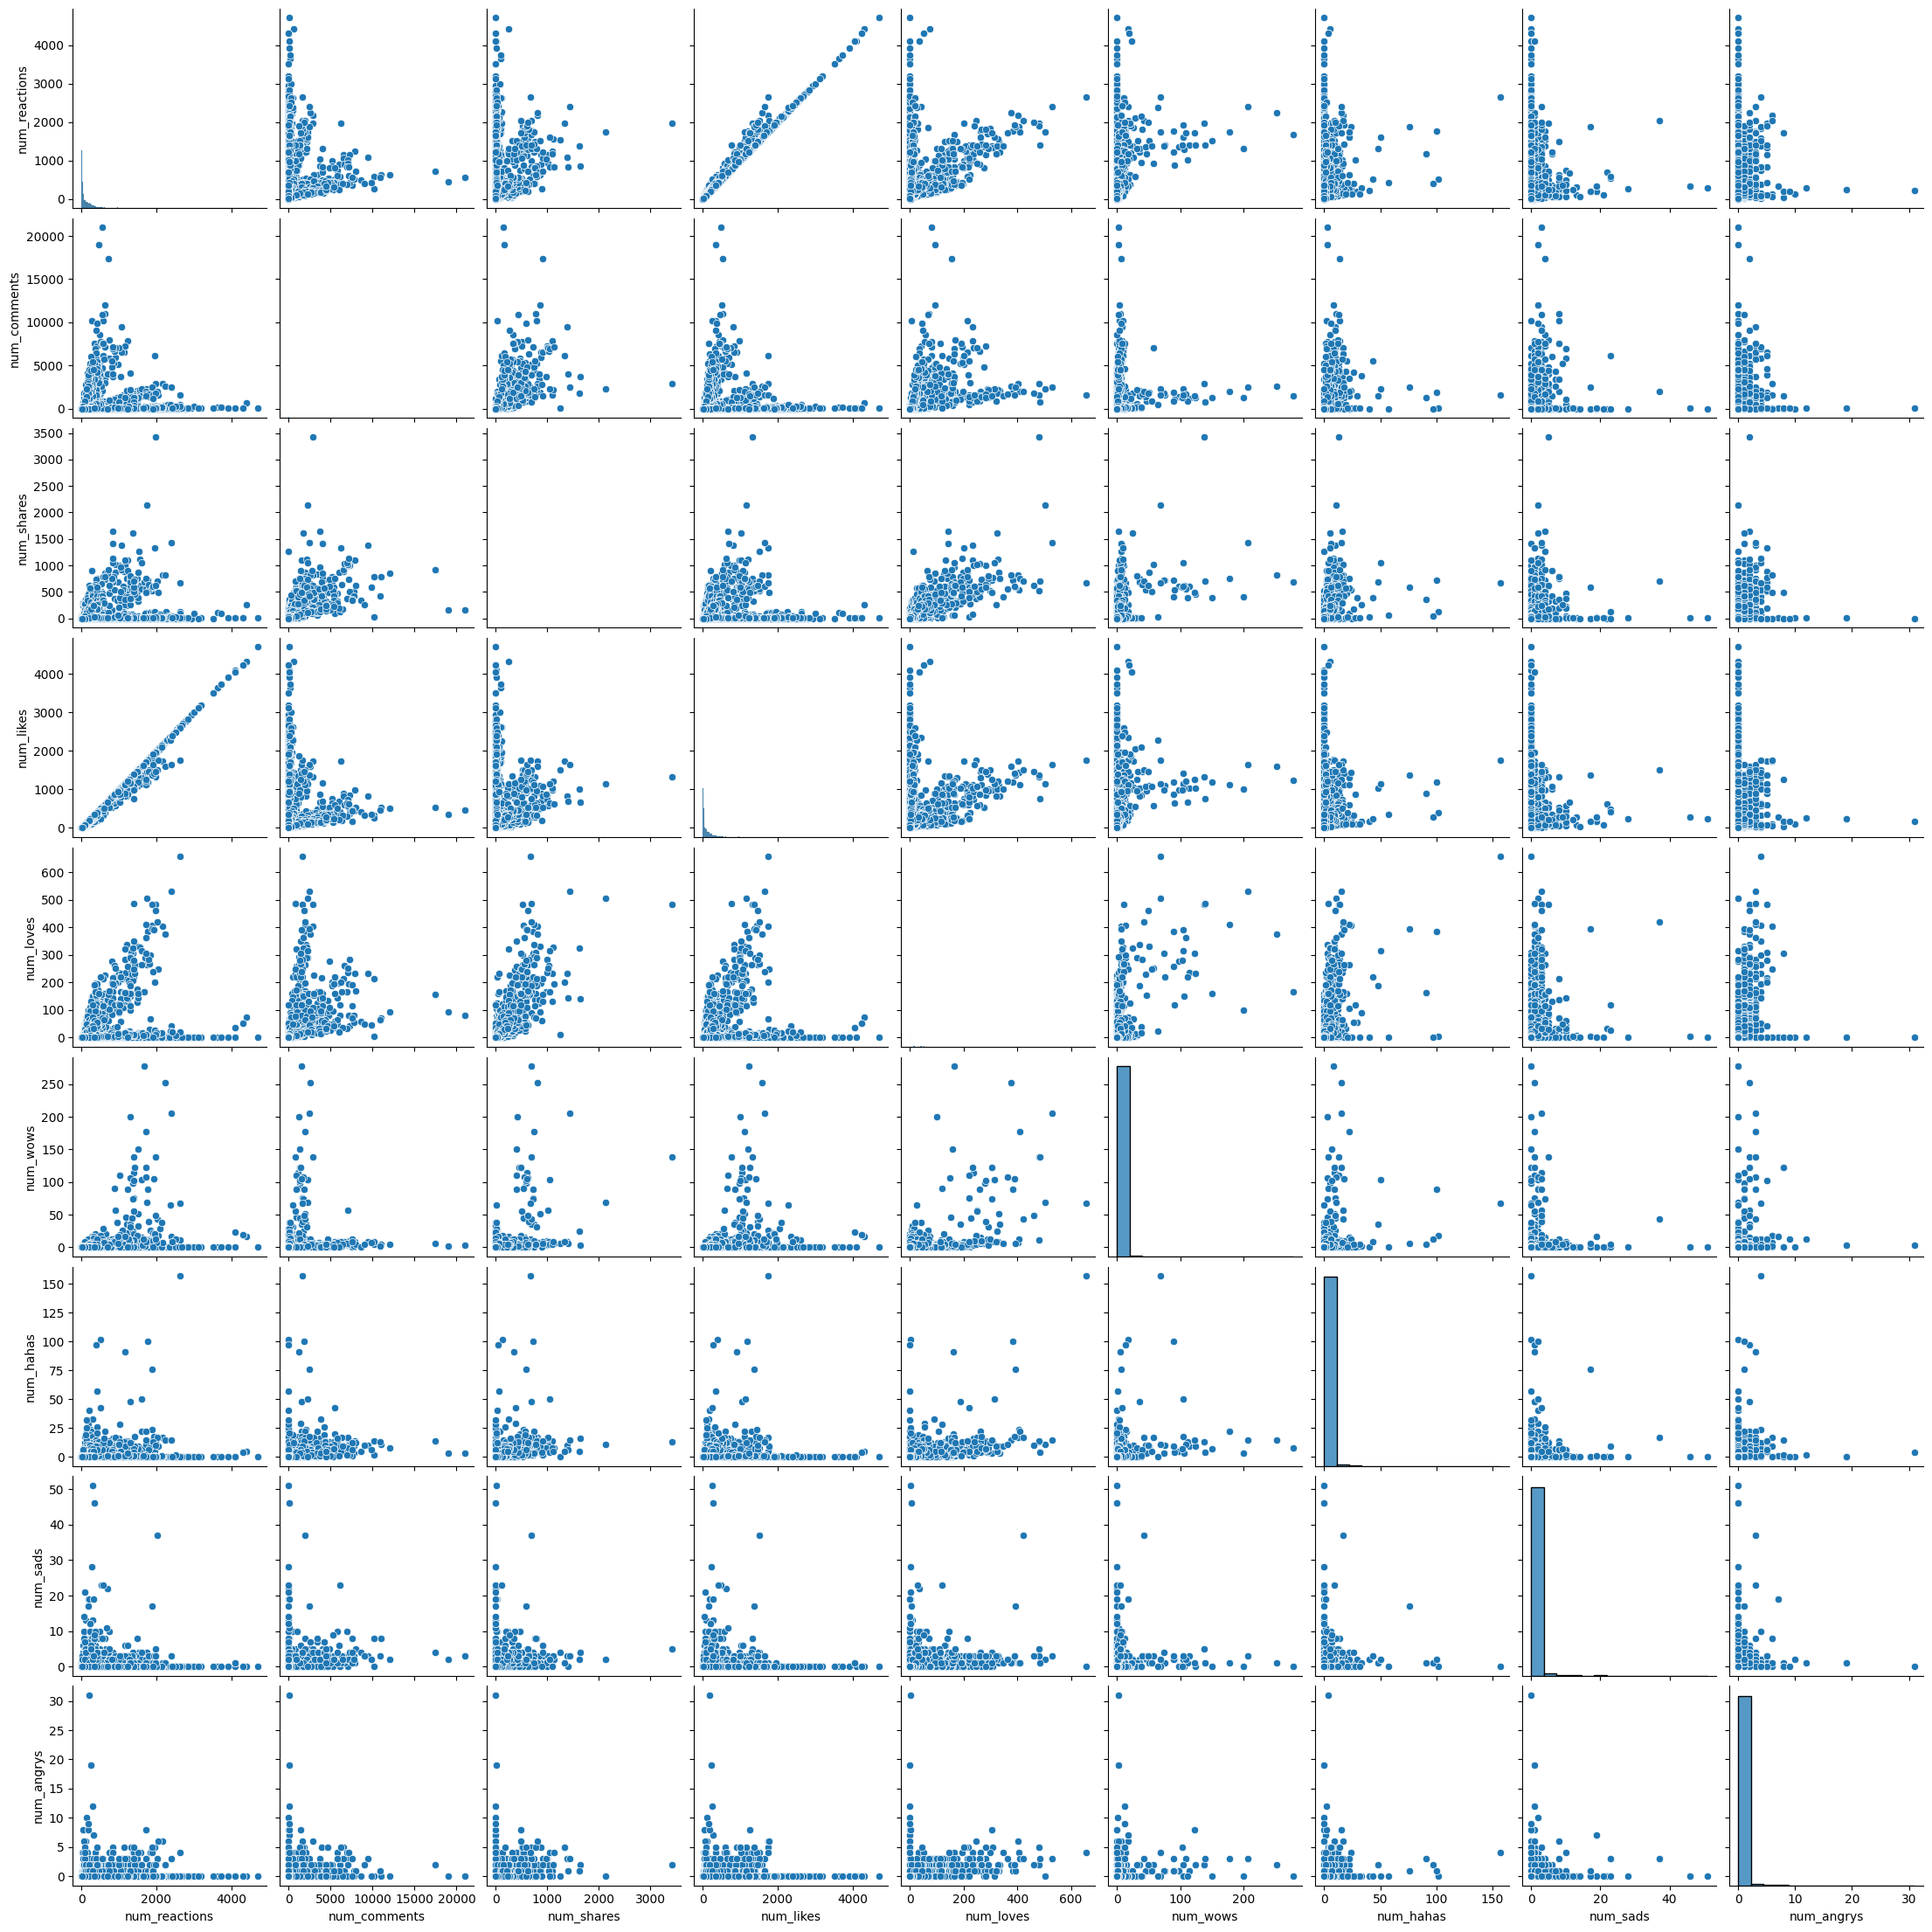

In [16]:
sns.pairplot(k_means_df)

In [19]:
X = k_means_df
y=k_means_df['status_type']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [21]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [141]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7,random_state=42)
kmeans.fit(X)

c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7, random_state=42)

In [142]:
kmeans.cluster_centers_

array([[1.58381210e+00, 8.79043596e+01, 4.19449138e+01, 1.26395742e+01,
        8.24221021e+01, 4.55035485e+00, 4.36465022e-01, 2.83203785e-01,
        1.51909429e-01, 5.81277459e-02],
       [1.57918552e+00, 2.25398643e+03, 1.31914027e+02, 4.07375566e+01,
        2.22833032e+03, 1.93076923e+01, 4.61990950e+00, 1.37104072e+00,
        2.35294118e-01, 1.22171946e-01],
       [2.93939394e+00, 7.09878788e+02, 7.83906061e+03, 6.69606061e+02,
        5.52333333e+02, 1.37181818e+02, 6.75757576e+00, 8.57575758e+00,
        3.60606061e+00, 1.42424242e+00],
       [3.00000000e+00, 4.46007389e+02, 1.33683251e+03, 3.00916256e+02,
        3.33605911e+02, 9.82438424e+01, 8.50000000e+00, 4.17980296e+00,
        8.44827586e-01, 6.33004926e-01],
       [3.00000000e+00, 5.74666667e+02, 1.91356667e+04, 4.09333333e+02,
        4.50333333e+02, 1.10333333e+02, 3.66666667e+00, 6.66666667e+00,
        3.00000000e+00, 6.66666667e-01],
       [3.00000000e+00, 4.28490196e+02, 4.06120588e+03, 4.24598039e+02,
   

In [143]:
kmeans.inertia_

923467689.3400351

In [144]:
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [145]:
correct_lb = sum(y == labels)
correct_lb

591

## Using Elbow Method to get a better K value

In [146]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

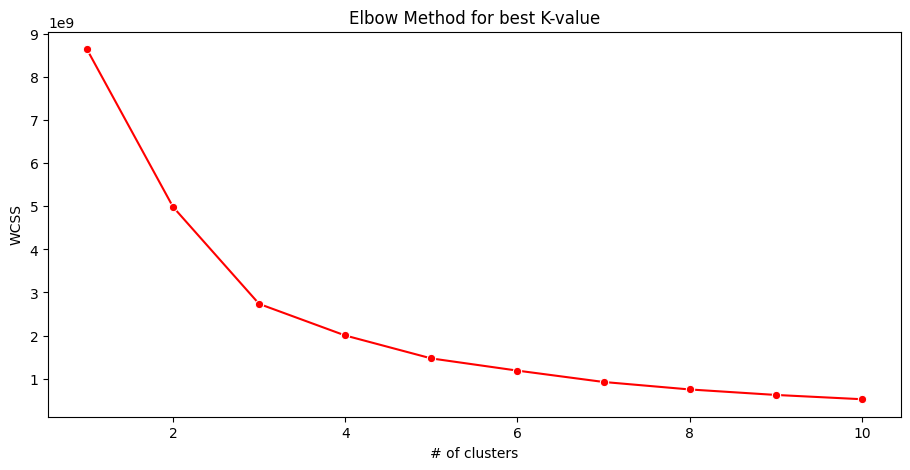

In [147]:
plt.figure(figsize=(11,5))
sns.lineplot(x=range(1,11),y=wcss,marker="o",color='red')
plt.title("Elbow Method for best K-value")
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.show()